In [1]:
import numpy as np
import qiskit.quantum_info
from qiskit.execute_function import execute
from qiskit import *
import qiskit
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('statevector_simulator')


from src.SYMQCircuit import *
from src.Tools import _get_state_probabilities_

# Testing 1 qubit gates:

In [2]:
nr = 1
size = 2


test = QuantumCircuit(size)
test.x(nr)

test2 = SYMQCircuit(size)
test2.add_x(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [3]:
test = QuantumCircuit(size)
test.y(nr)

test2 = SYMQCircuit(size)
test2.add_y(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [4]:
test = QuantumCircuit(size)
test.z(nr)

test2 = SYMQCircuit(size)
test2.add_z(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [5]:
test = QuantumCircuit(size)
test.h(nr)

test2 = SYMQCircuit(size)
test2.add_h(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [6]:
test = QuantumCircuit(size)
test.rx(1/3,nr)

test2 = SYMQCircuit(size)
test2.add_rx(nr,1/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [7]:
test = QuantumCircuit(size)
test.ry(1/3,nr)

test2 = SYMQCircuit(size)
test2.add_ry(nr,1/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [8]:
test = QuantumCircuit(size)
test.rz(1/3,nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [9]:
test = QuantumCircuit(size)
test.t(nr)

test2 = SYMQCircuit(size)
test2.add_t(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [10]:
test = QuantumCircuit(size)
test.s(nr)

test2 = SYMQCircuit(size)
test2.add_s(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [11]:
test = QuantumCircuit(size)
test.p(qubit=nr,theta=0.76651)

test2 = SYMQCircuit(size)
test2.add_p(target_qubit=nr,angle=0.76651)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [12]:
test = QuantumCircuit(size)
test.u(theta=np.pi/3,phi=np.pi/67,lam=np.pi/13,qubit=nr)

test2 = SYMQCircuit(size)
test2.add_u(angle_1=np.pi/3,angle_2=np.pi/67,angle_3=np.pi/13,target_qubit=nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

In [13]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.ry(4/3,nr)
test.x(nr)
test.u(theta=np.pi/33,phi=np.pi/673,lam=np.pi/133,qubit=nr)
test.h(nr)
test.s(nr)
test.rx(2/7,nr)
test.t(nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_ry(nr,4/3)
test2.add_x(nr)
test2.add_u(angle_1=np.pi/33,angle_2=np.pi/673,angle_3=np.pi/133,target_qubit=nr)
test2.add_h(nr)
test2.add_s(nr)
test2.add_rx(nr,2/7)
test2.add_t(nr)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

# Testing 2 qubit gates:


--------------
#### CNOT:
--------------

In [14]:
nr = 1
size = 3

test = QuantumCircuit(size)
test.cnot(control_qubit=1,target_qubit=2)
qiskit_cnot = qiskit.quantum_info.Operator(test).data.real.astype(int)

test2 = SYMQCircuit(size)
test2.add_cnot(control_qubit=1,target_qubit=2)
my_cnot = test2.get_circuit_unitary().real.astype(int)

if not np.allclose(my_cnot,qiskit_cnot):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

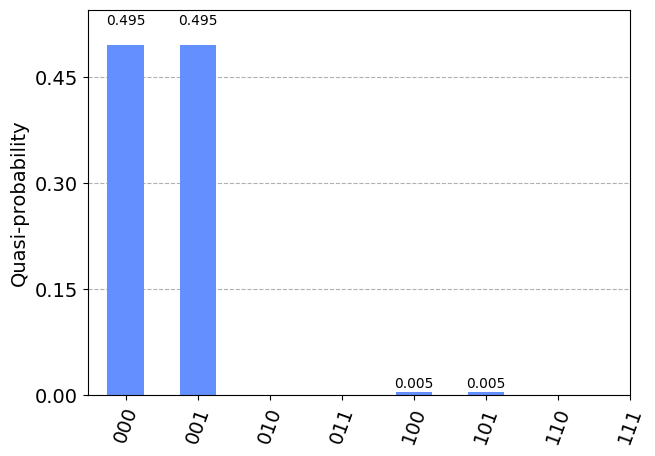

In [15]:
size = 3

test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=2)
test.cnot(control_qubit=1,target_qubit=2)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=2)
test2.add_cnot(control_qubit=1,target_qubit=2)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

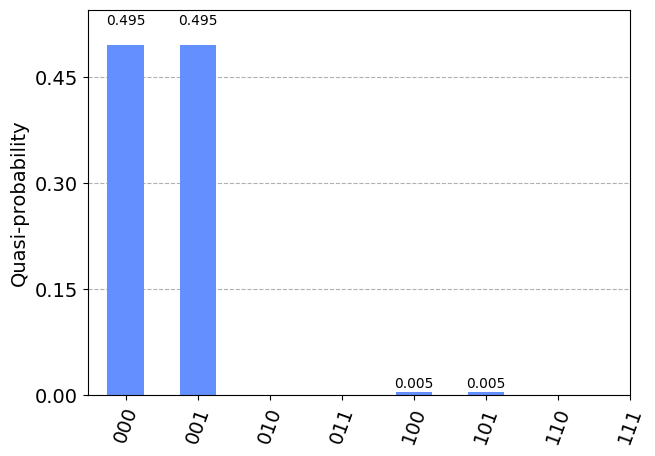

In [16]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
reversed_states = {}
plot_histogram(probs)

---------------
#### SWAP:
--------------

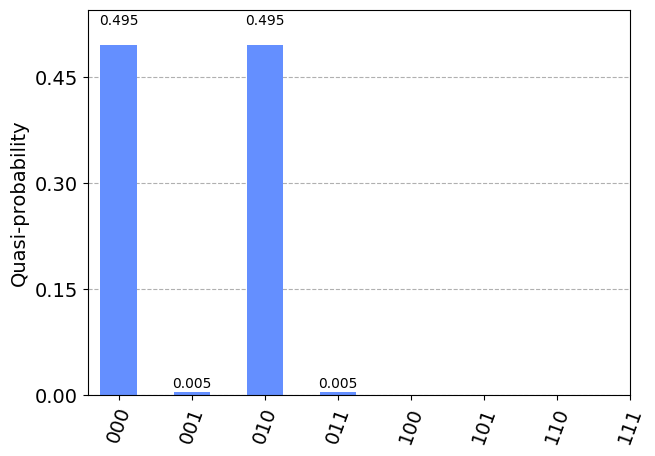

In [17]:
size = 3
test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=1)
test.swap(qubit1=0,qubit2=1)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=1)
test2.add_swap(qubit_1=0,qubit_2=1)


if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

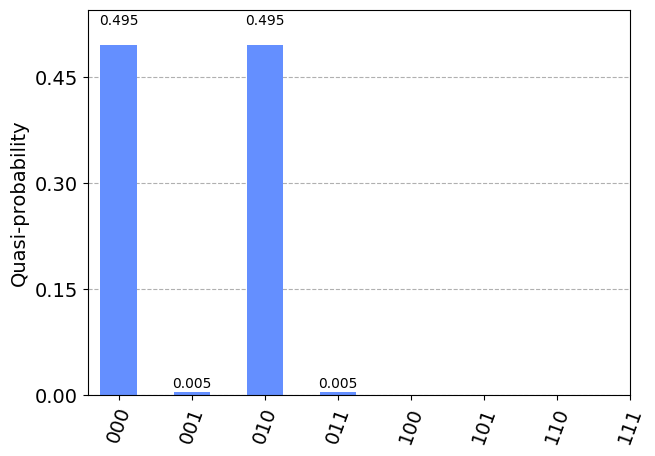

In [18]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RZZ:
--------------

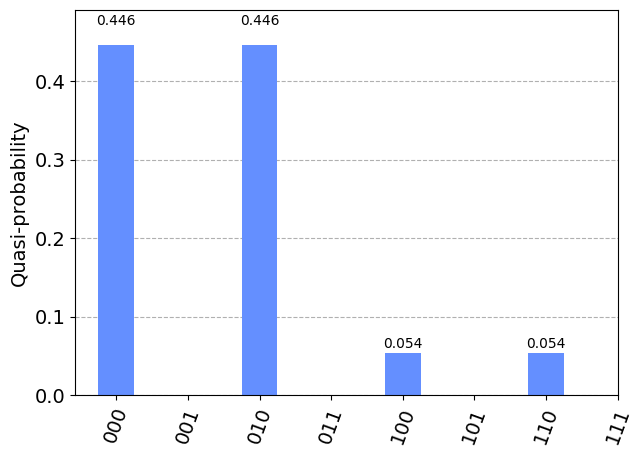

In [19]:
size = 3
nr = 2
test = QuantumCircuit(size)
test.h(1)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.rzz(qubit1=1,qubit2=2, theta=np.pi/3)


test2 = SYMQCircuit(size)
test2.add_h(1)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_rzz(qubit_1=1,qubit_2=2, angle=np.pi/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")
probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

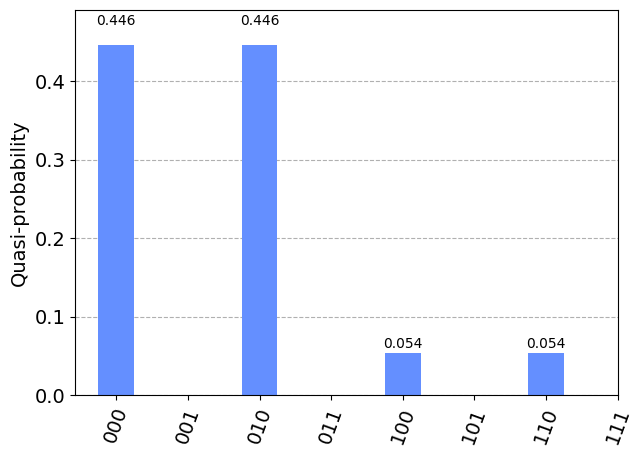

In [20]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RXX:
--------------

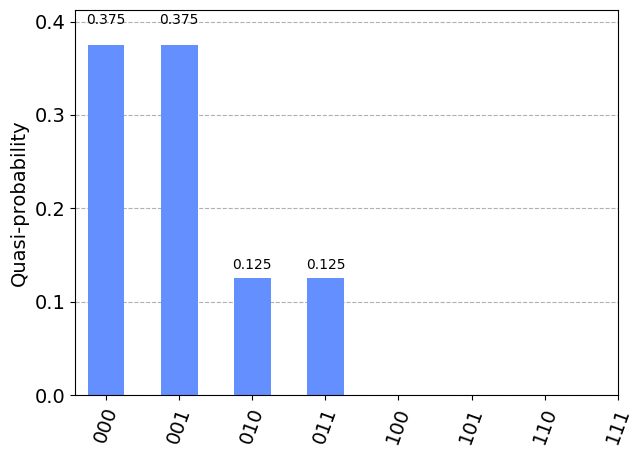

In [21]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.rxx(theta=np.pi/3,qubit1=0,qubit2=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_rxx(qubit_1=0,qubit_2=1, angle=np.pi/3)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

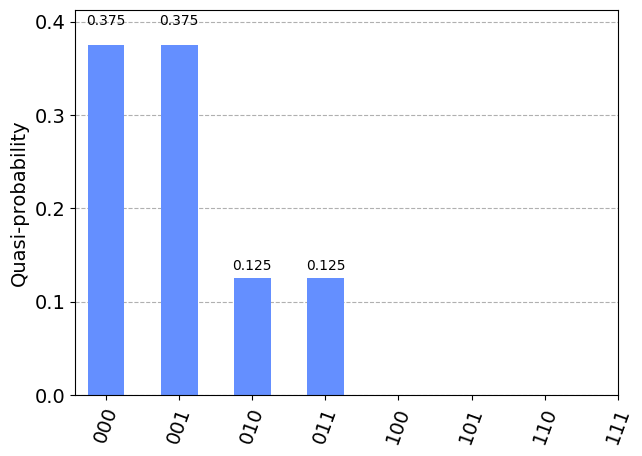

In [22]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### RYY:
--------------

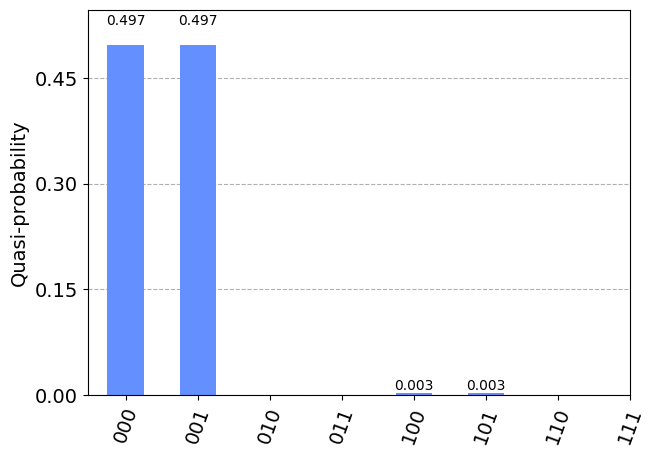

In [23]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.ryy(theta=np.pi/21,qubit1=0,qubit2=2)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_ryy(qubit_1=0,qubit_2=2, angle=np.pi/21)


if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

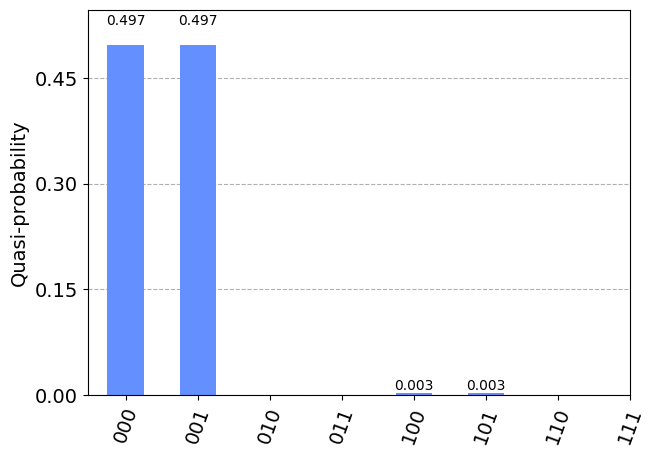

In [24]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CY:
--------------

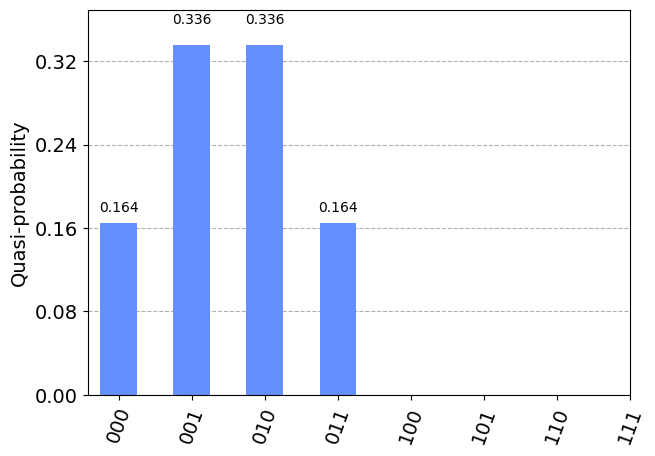

In [25]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.cy(control_qubit=0,target_qubit=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_cy(control_qubit=0,target_qubit=1)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")
probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

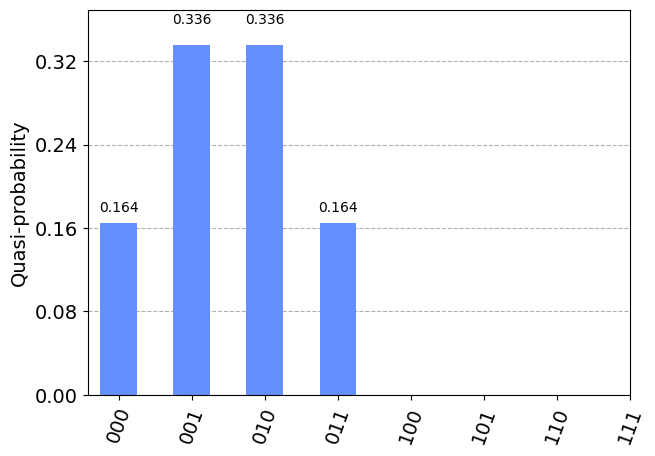

In [26]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CZ:
--------------

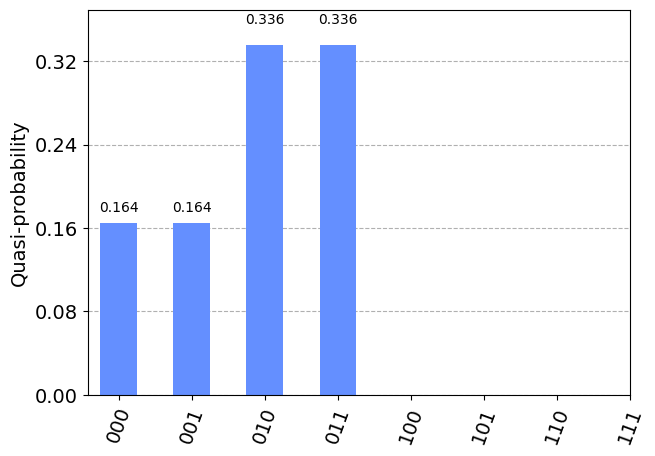

In [27]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.cz(control_qubit=0,target_qubit=1)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_cz(control_qubit=0,target_qubit=1)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

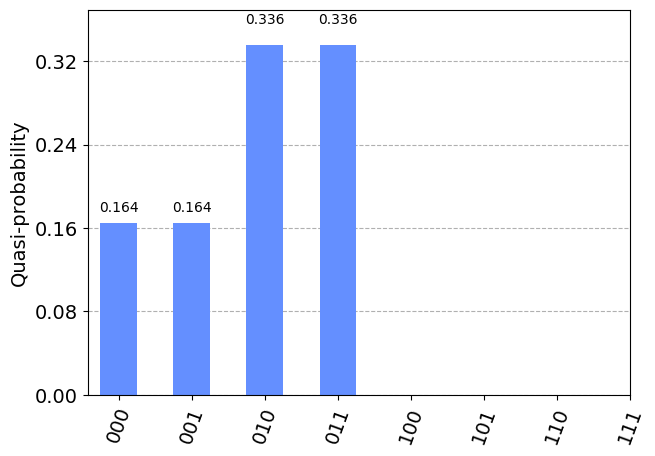

In [28]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CRZ:
--------------

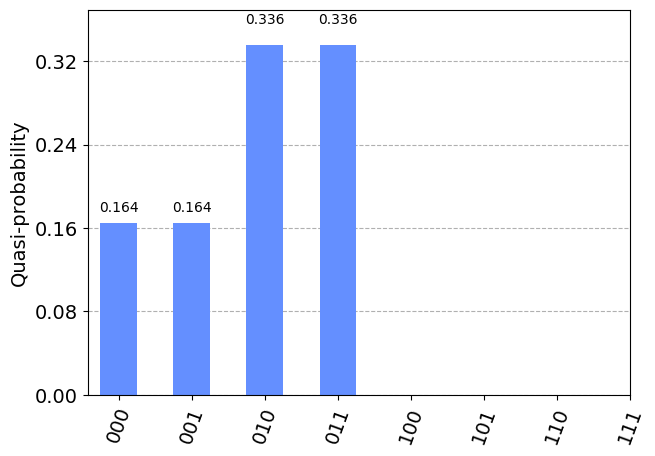

In [29]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.crz(control_qubit=0,target_qubit=1,theta=0.1234)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_crz(control_qubit=0,target_qubit=1, angle=0.1234)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

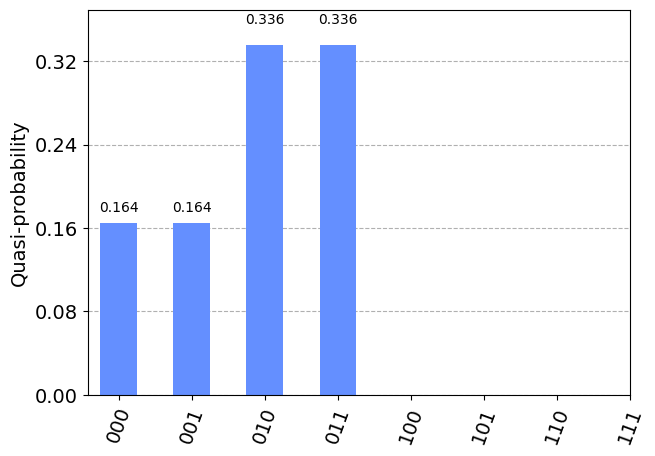

In [30]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CRX:
--------------

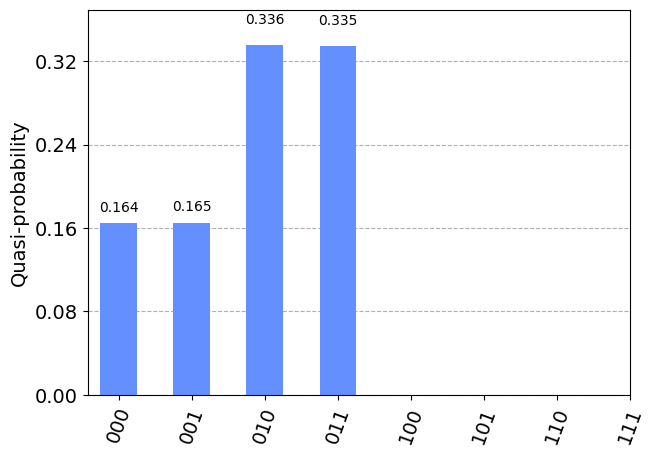

In [31]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.crx(control_qubit=0,target_qubit=1,theta=0.1234)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_crx(control_qubit=0,target_qubit=1, angle=0.1234)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

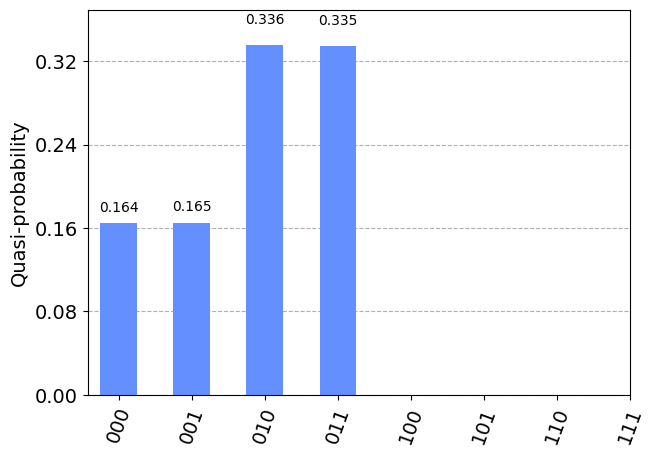

In [32]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)

--------------
#### CRY:
--------------

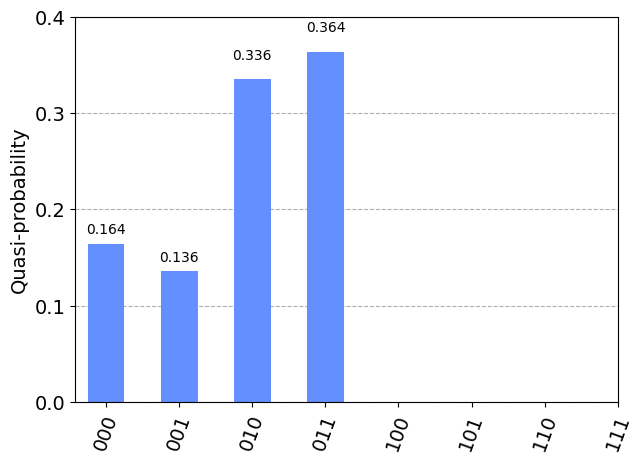

In [33]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,1)
test.h(0)
test.h(1)
test.ry(qubit=1,theta=np.pi/9)
test.cry(control_qubit=0,target_qubit=1,theta=0.1234)


test2 = SYMQCircuit(size)
test2.add_rz(1,1/3)
test2.add_h(0)
test2.add_h(1)
test2.add_ry(target_qubit=1,angle=np.pi/9)
test2.add_cry(control_qubit=0,target_qubit=1, angle=0.1234)

if not np.allclose(qiskit.quantum_info.Operator(test).data,test2.get_circuit_unitary()):
    raise ArithmeticError("Qiskit circuit unitary is different from own impl.")

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

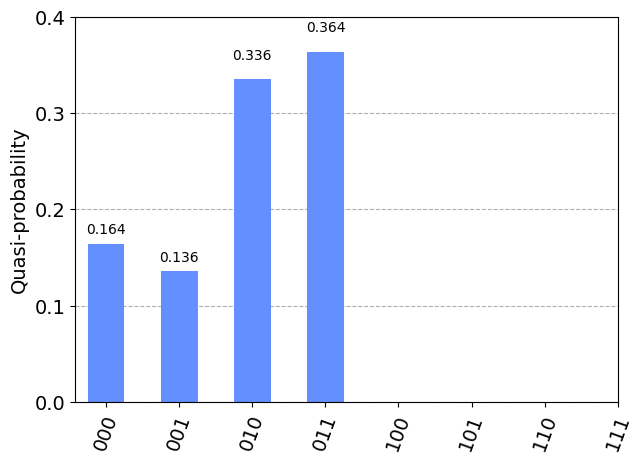

In [34]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = _get_state_probabilities_(state_vector_=statevec)
plot_histogram(probs)